<h2> Import libraries </h2>

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

<h2> Data Collection and Preprocessing </h2>

In [3]:
dataset = pd.read_csv('loan.csv')

In [4]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
dataset.shape

(614, 13)

In [6]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
dataset = dataset.dropna()

In [8]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [35]:
dataset.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)
dataset['Loan_Status'].value_counts()

Loan_Status
1    332
0    148
Name: count, dtype: int64

In [10]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [11]:
dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [12]:
dataset = dataset.replace(to_replace='3+', value=4)

<h4> Data Visualisation </h4>

<Axes: xlabel='Education', ylabel='count'>

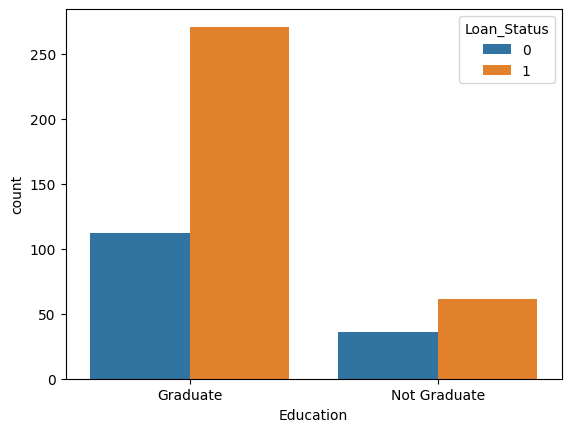

In [14]:
sns.countplot(x="Education", hue="Loan_Status", data=dataset)

In [23]:
dataset.replace({"Married":{'No':0, 'Yes':1}, "Gender":{'Male':1, 'Female':0}, "Self_Employed":{'No':0, 'Yes':1}, "Property_Area":{'Rural':0, 'Semiurban': 1, 'Urban': 2}, 'Education':{'Graduate':1, 'Not Graduate':0}}, inplace=True)

In [24]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [25]:
X = dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
y = dataset['Loan_Status']
print(X)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

<h4> Standardisation </h4>

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

<h4> Train Test Split </h4>

In [28]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2)

In [29]:
print(X.shape, Xtrain.shape, Xtest.shape)

(480, 11) (432, 11) (48, 11)


<h4> Training Model </h4>

In [32]:
classifier = svm.SVC(kernel='linear')
classifier.fit(Xtrain, Ytrain)

SVC(kernel='linear')

<h4> Model evaluation </h4>

In [33]:
trainPrediction = classifier.predict(Xtrain)
trainAccuracy = accuracy_score(trainPrediction, Ytrain)
print(trainAccuracy)

0.8055555555555556


In [34]:
testPrediction = classifier.predict(Xtest)
testAccuracy = accuracy_score(testPrediction, Ytest)
print(testAccuracy)

0.8333333333333334
